In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(stringr))
library(plyr)
library(purrr)
library(rstatix)
library(ggpubr)
library(ggsci)
library(ggrepel)
source('../helper_function/helper_function_IHA.r')

Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘plyr’ was built under R version 4.3.3”
------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Warning message:
“package ‘purrr’ was built under R version 4.3.3”

Attaching pa

In [2]:
freq=read.csv('01_Flow_Tfh/freq_T.csv')

In [3]:
last_chars <- sapply(freq$sample.visitName, function(string) {
  substr(string, nchar(string), nchar(string))
})
freq$visit<-paste0("Y",freq$Flu_Year,'-D',last_chars)
freq<-freq %>% group_by(sample.sampleKitGuid) %>%     
  dplyr::mutate(frequency_clr = clr_transform((frequency))) %>%
  dplyr::ungroup()

In [4]:
Year='2020'

In [5]:
freq_2020_Tfh<-freq %>% filter(Flu_Year==Year) %>% filter(labels %in% c("CXCR5+ PD1+ CD38+ ICOS+ Tfh"))


In [6]:
freq_2020_Tfh$Group<-paste0(freq_2020_Tfh$cohort.cohortGuid,'_',freq_2020_Tfh$visit)

In [7]:
freq_2020_Tfh <- freq_2020_Tfh %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
freq_2020_Tfh$`Age Group`<-factor(freq_2020_Tfh$`Age Group`,levels=c("Young","Older"))

In [8]:
freq_2020_Tfh$Group<-paste0(freq_2020_Tfh$`Age Group`,'_',freq_2020_Tfh$visit)

In [9]:
freq_2020_Tfh$Group<-factor(freq_2020_Tfh$Group,levels=c('Young_Y2020-D0','Young_Y2020-D7',
                                                        'Older_Y2020-D0','Older_Y2020-D7'))

In [10]:

write.csv(freq_2020_Tfh  %>% select(subject.subjectGuid,Group,`Age Group`,labels,frequency_clr),
          "/home//workspace/Source_Data/Extended_Fig8a.csv",row.names=FALSE)

In [12]:
table(freq_2020_Tfh$`Age Group`)/2


Young Older 
   44    45 

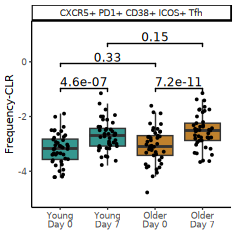

In [14]:
options(repr.plot.width = 50/25.4, repr.plot.height = 52/25.4)

p<-ggplot(freq_2020_Tfh %>% arrange(subject.subjectGuid), aes(x=Group, y=frequency_clr, fill=`Age Group`)) +
   geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(position = position_jitter(width = 0.2),color="black", size=0.8,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means( label = "p.format",method='wilcox.test',paired=TRUE,size=2.5,
  comparisons = list(c("Older_Y2020-D0", "Older_Y2020-D7")))+  
stat_compare_means( label = "p.format",method='wilcox.test',paired=TRUE,size=2.5,
  comparisons = list(c("Young_Y2020-D0", "Young_Y2020-D7")))+  
stat_compare_means(aes(label = paste0("p = ", after_stat(p.format))),
                   method='wilcox.test',size=2.5,
                   paired=FALSE,label.y=-0.25,
  comparisons = list(c("Older_Y2020-D0", "Young_Y2020-D0")))+  
stat_compare_means(aes(label = paste0("p = ", after_stat(p.format))),
                   method='wilcox.test',
                   paired=FALSE,label.y=0.5,size=2.5,
  comparisons = list(c("Older_Y2020-D7", "Young_Y2020-D7")))+
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
    scale_y_continuous(limits = c(NA, NA),
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('Frequency-CLR')+
facet_wrap(~labels,  scale='free_y') +theme(
panel.border = element_blank())   + 
scale_x_discrete(labels = c("Older_Y2020-D0" = "Older\nDay 0", 
                              "Older_Y2020-D7" = "Older\nDay 7",
                              "Young_Y2020-D0" = "Young\nDay 0",
                              "Young_Y2020-D7" = "Young\nDay 7")) 
p
ggsave('FigureA.pdf',p,width = 50/25.4,height = 54/25.4)